<a href="https://colab.research.google.com/github/Veena9977/Practice2/blob/main/cnnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import TensorFlow
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
import kagglehub

path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

100%|██████████| 1.98G/1.98G [00:28<00:00, 74.7MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [3]:
import os

# Path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8'

# List all files in the directory
file_list = os.listdir(dataset_path)

# Print the files
print(file_list)


['test', 'train', 'validation']


In [4]:
#Base_dir specifies the root directory of the dataset. Joins base_dir with the subfolder train,test,validation.
base_dir = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'validation')


In [5]:
 #Sets up an image data generator (train_datagen) using Keras ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
#ImageDataGenerator to prepare the test dataset by rescaling the image pixel values to the range [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load the train datasets using flow_from_directory. Resize images to 224x224
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)


Found 3115 images belonging to 36 classes.


In [42]:
# Load the test datasets using flow_from_directory. Resize images to 224x224
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 359 images belonging to 36 classes.


In [9]:
# Load the validation datasets using flow_from_directory. Resize images to 224x224
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 351 images belonging to 36 classes.


In [10]:
#keys() method extracts only the keys from the dictionary, which are the class names
class_names = list(train_generator.class_indices.keys())

In [11]:
#next() function on the generator, which retrieves the next batch of images and labels.
train_images, train_labels = next(train_generator)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
##next() function on the generator, which retrieves the next batch of images and labels.
test_images, test_labels= next(test_generator)

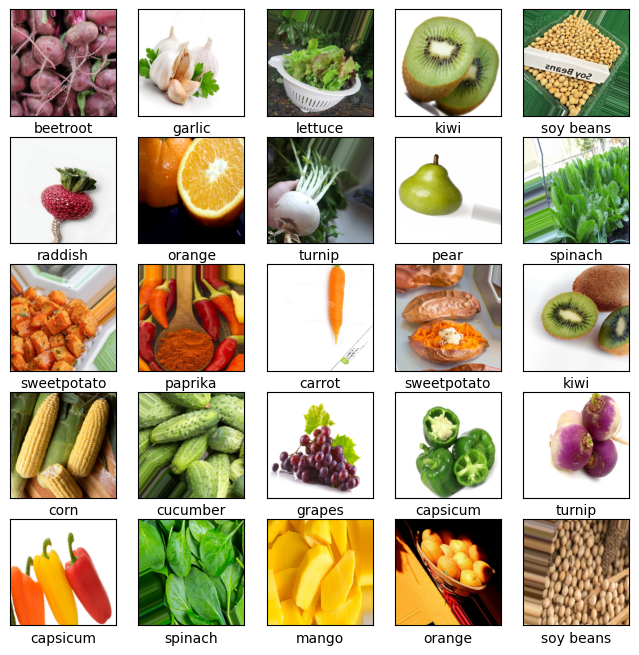

In [13]:
#Display the image.Create a 5x5 grid of subplots
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i])])

plt.show()

In [14]:
#Build the CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),  # Pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')]) # Output layer with softmax activation for multi-class classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
              metrics=['accuracy'])

In [16]:
#Display the architecture of our model.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,075,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,134,308 (42.47 MB)

 Trainable params: 11,134,308 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Train the model
history = model.fit(
    train_generator,
    epochs= 30,
    validation_data=val_generator,
    verbose=1
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 461s 5s/step - accuracy: 0.0288 - loss: 3.9538 - val_accuracy: 0.0684 - val_loss: 3.3481
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 470s 5s/step - accuracy: 0.0819 - loss: 3.3321 - val_accuracy: 0.1453 - val_loss: 2.9807
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 499s 5s/step - accuracy: 0.1278 - loss: 3.0605 - val_accuracy: 0.2422 - val_loss: 2.5484
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 459s 5s/step - accuracy: 0.1914 - loss: 2.7192 - val_accuracy: 0.2934 - val_loss: 2.2342
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 454s 5s/step - accuracy: 0.2209 - loss: 2.5653 - val_accuracy: 0.3818 - val_loss: 1.9855
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 476s 5s/step - accuracy: 0.2776 - loss: 2.4622 - val_accuracy: 0.3590 - val_loss: 1.9248
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 458s 5s/step - accuracy: 0.2473 - loss: 2.4559 - val_accuracy: 0.4131 - val_loss: 1.8049
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 457s 5s/step - accuracy: 0.2815 - loss: 2.2916 - val_accuracy: 0.4330 - val_loss: 1.

loss is high hence use pretrained VGG

In [94]:
test_loss, test_acc = model.evaluate(test_generator)

12/12 ━━━━━━━━━━━━━━━━━━━━ 236s 19s/step - accuracy: 0.1368 - loss: 4.8769


In [95]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.17270195484161377


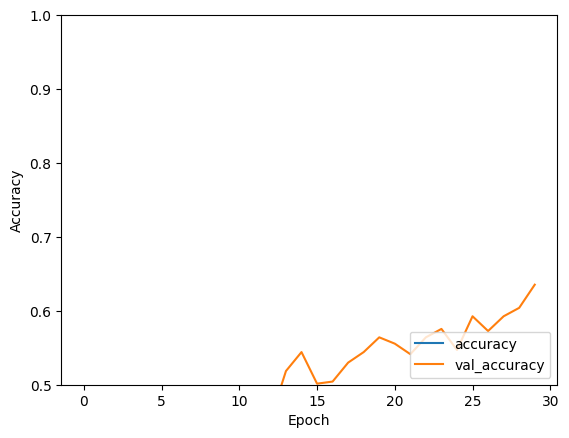

In [40]:
#Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [66]:
# Check if test_generator retrieves images
test_images, test_labels= next(test_generator)
print(test_images.shape, test_labels.shape)


(32, 224, 224, 3) (32,)


In [67]:
#Pre-trained VGG
from tensorflow.keras.applications import VGG16

In [75]:
## Load pre-trained VGG16 without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [76]:
# Freeze the pre-trained layers
base_model.trainable = False

In [77]:
#Add custom layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(36, activation='softmax')
])

In [82]:
from tensorflow.keras.optimizers import Adam

In [90]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
#Train the model
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step - accuracy: 0.1562 - loss: 4.6102 - val_accuracy: 0.2188 - val_loss: 2.5658
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 82s 82s/step - accuracy: 0.1875 - loss: 4.5371 - val_accuracy: 0.2188 - val_loss: 2.5702
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 83s 83s/step - accuracy: 0.1875 - loss: 4.4656 - val_accuracy: 0.2500 - val_loss: 2.5757
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 79s 79s/step - accuracy: 0.1875 - loss: 4.3953 - val_accuracy: 0.2500 - val_loss: 2.5819
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.1875 - loss: 4.3265 - val_accuracy: 0.2500 - val_loss: 2.5892
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 82s 82s/step - accuracy: 0.1875 - loss: 4.2592 - val_accuracy: 0.2812 - val_loss: 2.5975
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 61s 61s/step - accuracy: 0.2188 - loss: 4.1930 - val_accuracy: 0.2812 - val_loss: 2.6069
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.2188 - loss: 4.1278 - val_accuracy: 0.2812 - val_loss: 2.6172


In [92]:
test_loss, test_acc = model.evaluate(test_generator)

12/12 ━━━━━━━━━━━━━━━━━━━━ 236s 19s/step - accuracy: 0.1368 - loss: 4.8769


In [93]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.17270195484161377
